In [7]:
from DataInvestigator import DataInvestigator

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df = pd.read_csv('gallstone.csv')
di = DataInvestigator(df)




## Part 2 Question 1

Means by Gender:
            Height     Weight  Total Body Fat Ratio (TBFR) (%)  \
Gender                                                           
0       174.327160  85.753086                        23.121296   
1       159.757962  75.211465                        33.592803   

        Muscle Mass (MM)  Glomerular Filtration Rate (GFR)  
Gender                                                      
0              62.014815                        100.417358  
1              46.284713                        101.233236  


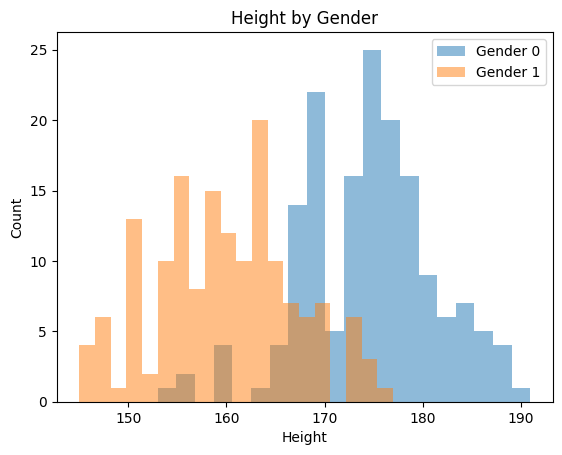

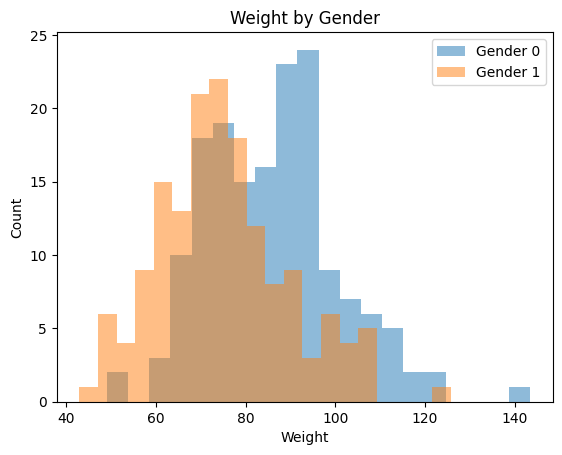

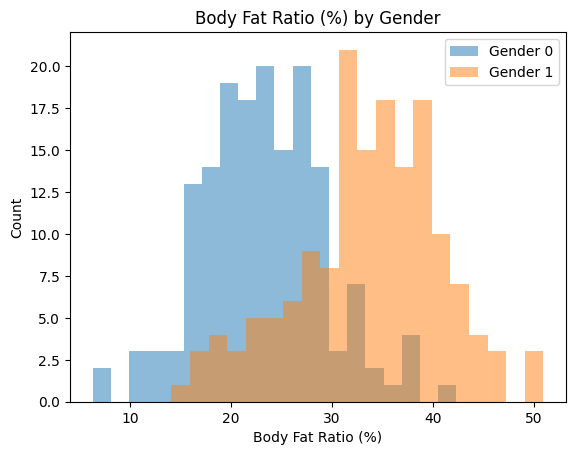

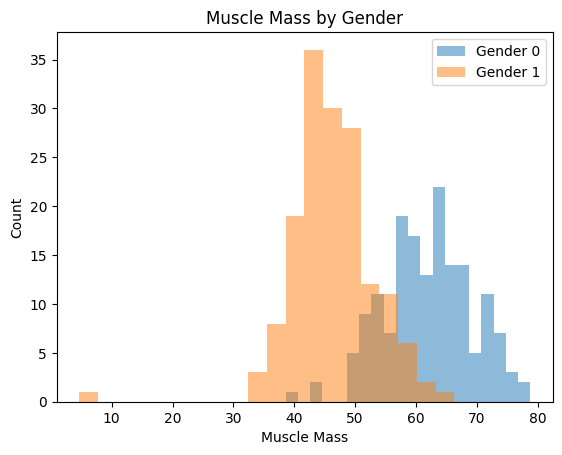

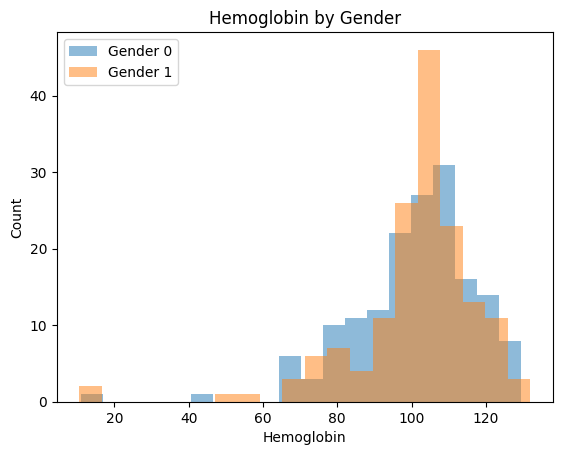

In [9]:
# Gender is column 2 (zero-indexed)
gender_col = 2

# Columns to compare (index: label)
columns_to_compare = {
    8: 'Height',
    9: 'Weight',
    15: 'Body Fat Ratio (%)',
    20: 'Muscle Mass',
    35: 'Hemoglobin'
}

# Print mean values for each gender
print("Means by Gender:")
print(df.groupby(df.columns[gender_col])[[df.columns[i] for i in columns_to_compare]].mean())

# Plot distributions for each feature by gender
for idx, label in columns_to_compare.items():
    plt.figure()
    for gender in sorted(df.iloc[:, gender_col].unique()):
        plt.hist(df[df.iloc[:, gender_col] == gender].iloc[:, idx], 
                 alpha=0.5, label=f'Gender {gender}', bins=20)
    plt.title(f'{label} by Gender')
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

By looking at those histogram, we can see gender 1 only has average body fat distribution that is higher than gender 0 and gender 0 has more average height and muscle mass than gender 1. So we can conclude gender 1 is female.

## Part 2 Question 2

In [20]:
print(df.groupby(df.columns[2])[[df.columns[35], df.columns[9], df.columns[8], df.columns[15], df.columns[20]]].mean())

glucose_counts = df.iloc[:, 26].value_counts()



        Glomerular Filtration Rate (GFR)     Weight      Height  \
Gender                                                            
0                             100.417358  85.753086  174.327160   
1                             101.233236  75.211465  159.757962   

        Total Body Fat Ratio (TBFR) (%)  Muscle Mass (MM)  
Gender                                                     
0                             23.121296         62.014815  
1                             33.592803         46.284713  


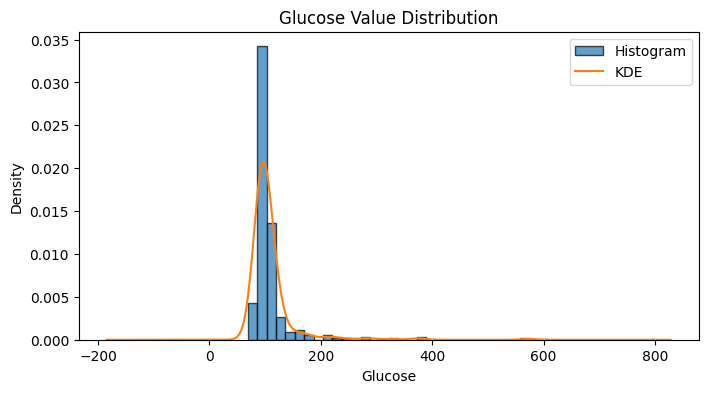

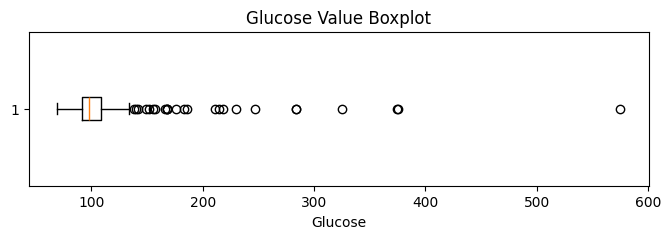

Shapiro-Wilk test p-value: 0.000000000000000000000000000002 (p < 0.05 suggests NOT normal)
Mean: 108.69, Std: 44.85
Normal range (mean ± 2*std): 18.99 to 198.39
Number of outliers (mean ± 2*std): 11
Outlier values:
[374. 575. 215. 247. 211. 230. 284. 284. 218. 325. 375.]


In [19]:

glucose = df.iloc[:, 26]

# 1. Histogram and KDE
plt.figure(figsize=(8,4))
plt.hist(glucose, bins=30, edgecolor='black', alpha=0.7, density=True, label='Histogram')
glucose.plot(kind='kde', label='KDE')
plt.title('Glucose Value Distribution')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. Boxplot for outliers
plt.figure(figsize=(8,2))
plt.boxplot(glucose, vert=False)
plt.title('Glucose Value Boxplot')
plt.xlabel('Glucose')
plt.show()

# 3. Normality test (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(glucose)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.30f} (p < 0.05 suggests NOT normal)")

# 4. Calculate mean, std, and normal range
mean = glucose.mean()
std = glucose.std()
normal_range = (mean - 2*std, mean + 2*std)
print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Normal range (mean ± 2*std): {normal_range[0]:.2f} to {normal_range[1]:.2f}")

# 5. Find outliers (outside mean ± 2*std)
outliers = glucose[(glucose < normal_range[0]) | (glucose > normal_range[1])]
print(f"Number of outliers (mean ± 2*std): {len(outliers)}")
print("Outlier values:")
print(outliers.values)

So the test p-value shows $2 \times 10^{-30} < 0.05$ meaning it is not normal. <br>
The Normal range is between $18.99$ to $198.39$ <br>
The outlier is shown to be $374, 575, 215, 247, 211, 230, 284, 284, 218, 325, 375$ <br>

In addition, box is located toward lower end of Glucose scale, showing most Glucose values are relatively low. The line inside the box is meidan.